In [3]:
from tensorflow import keras

In [4]:
model = keras.models.load_model("best-cnn-model.h5")        # refer to introducing_convolutional_neural_network.ipynb

In [5]:
model.layers

In [6]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [7]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.011197149 0.23960216


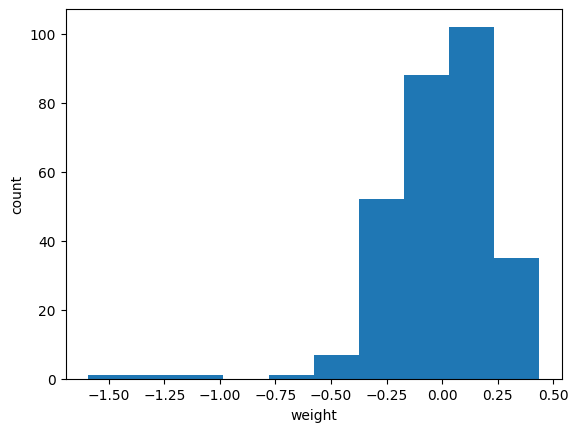

In [8]:
# Draw a histogram to visualize which distribution does this weight have
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))       # to array
plt.xlabel("weight")
plt.ylabel("count")

plt.show()

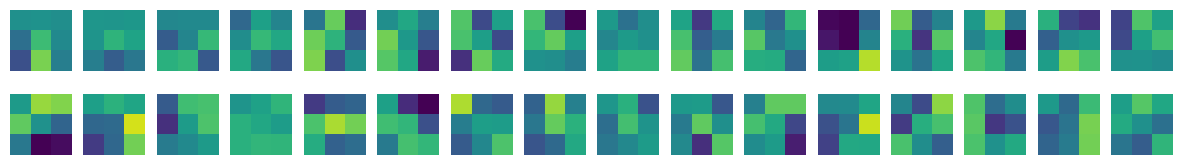

In [9]:
# Draw 32 kernels at the first Conv2D step
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis("off")

plt.show()

In [10]:
# Now let's see the visual side of CNN...

no_training_model = keras.Sequential()          # void and clean model
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same", input_shape = (28, 28, 1)))

In [11]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)            # the first layer (Conv2D X 32)'s weights are now saved to the variable.

(3, 3, 1, 32)


In [12]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0054237214 0.08107196


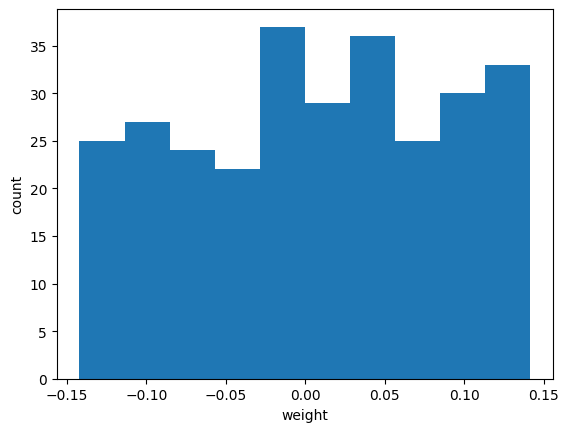

In [13]:
# Draw a histogram of weight array
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

# Because Tensorflow selects values from equalized distribution
# when it has to initialize the neural network's weights.

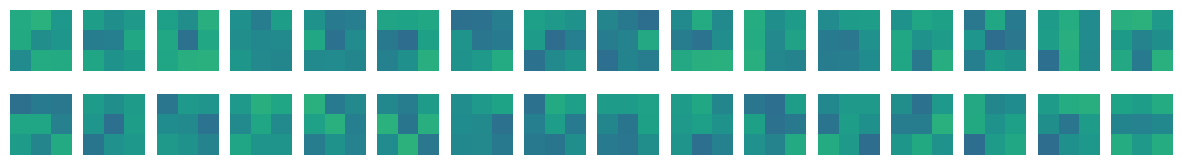

In [14]:
# Now let's visualize the weights with an image map
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis("off")

plt.show()

▲ By looking at the upper plot that visualizes the neural network's first weights as an image map, we can realized that the distribution of the color map is pretty blend. (Due to its characteristics selecting random values from equalized distribution at the initial step)

In [17]:
# The input property of the given model

print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [18]:
# Create a new model with functional API
conv_acti = keras.Model(model.input, model.layers[0].output)

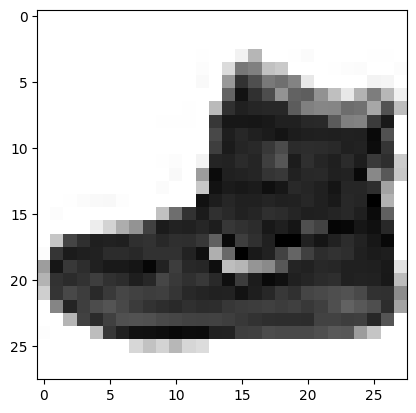

In [19]:
# Visualize the feature map

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap = "gray_r")
plt.show()

In [20]:
# Inject the upper data as a input to the conv_acti model created as custom
inputs = train_input[0 : 1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 3s 3s/step


In [22]:
print(feature_maps.shape)           # same padding and convolutions with 32 paddings

(1, 28, 28, 32)


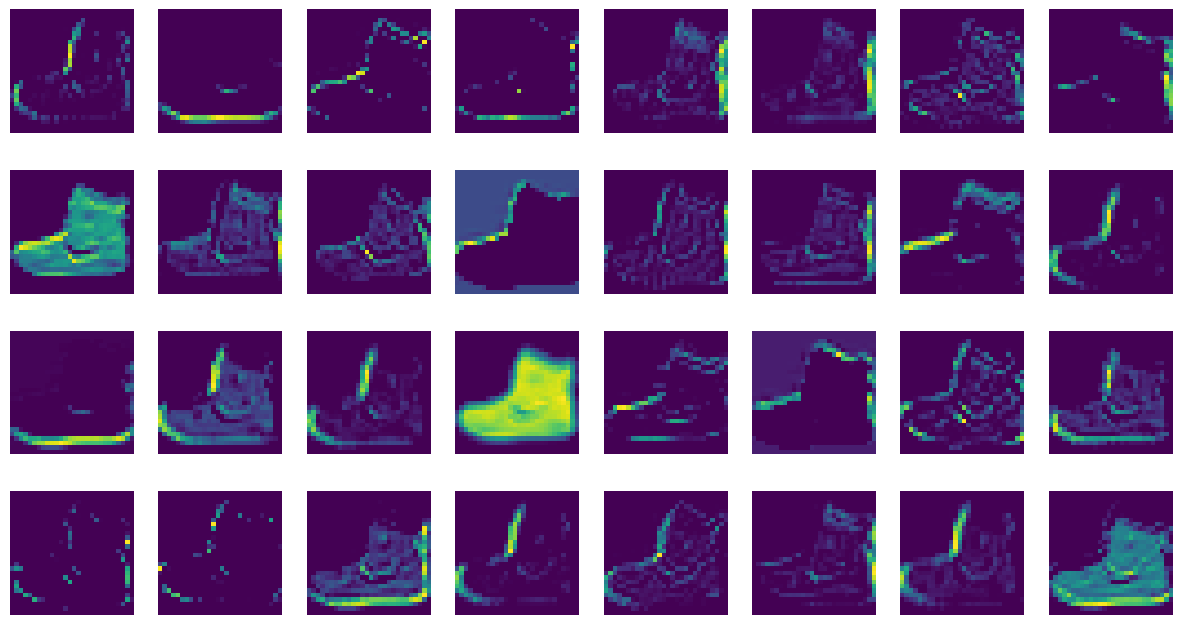

In [26]:
fig, axs = plt.subplots(4, 8, figsize = (15, 8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, : , : , i * 8 + j])
        axs[i, j].axis("off")

plt.show()              # Feature map (but they're visualized as image heatmaps)
                        # With 32 filters that is embedded in the custom model conv_acti,
                        # the following maps show which part of the given input data has been strongly impacted
                        # by the each filter.

In [27]:
# Let's see the second convolution's output, the feature map
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [28]:
inputs = train_input[0 : 1].reshape(-1, 28, 28, 1) / 255.0

feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 324ms/step


In [31]:
print(feature_maps.shape)       # It uses 64 filters, so the depth shoiuld be 64s
                                # Due to max pooling 2X2, the size of the each image has been shrinked by 1/2

(1, 14, 14, 64)


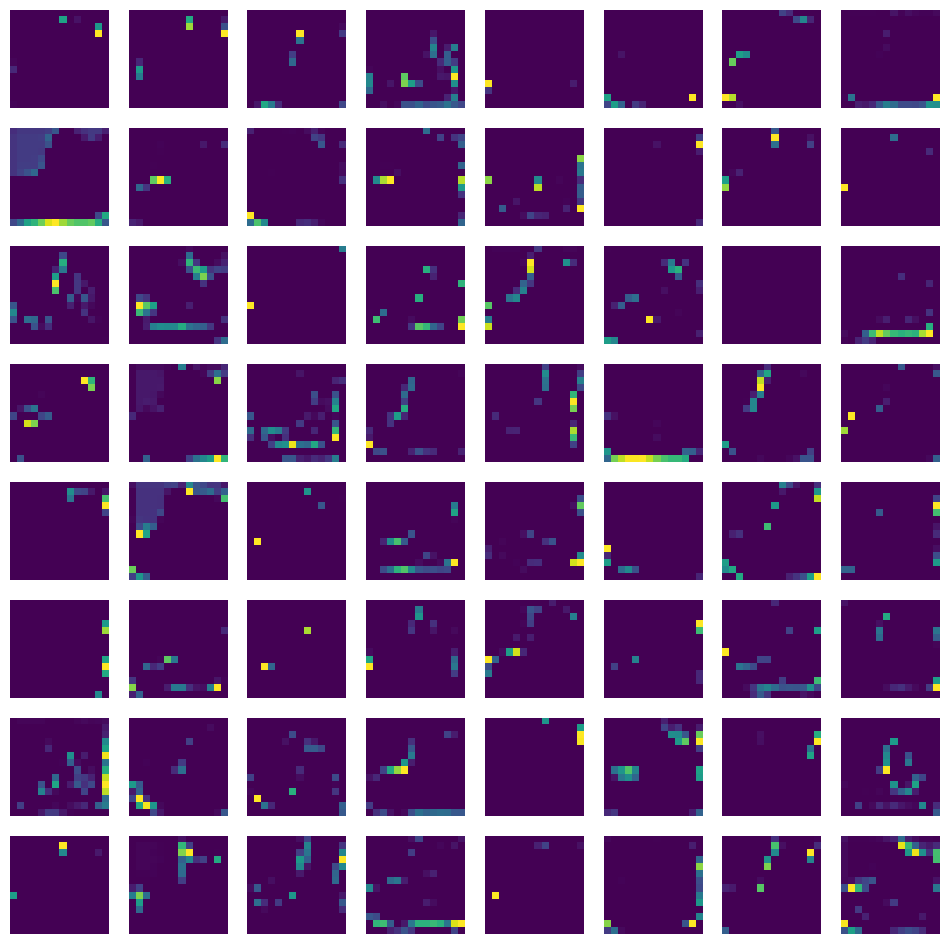

In [33]:
# Visualize! Now you gonna see 64 image heatmaps
fig, axs = plt.subplots(8, 8, figsize = (12, 12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, : , : , i * 8 + j])
        axs[i, j].axis("off")

plt.show()